In [1]:
from ffnn.healthcheck import healthcheck
healthcheck()

Healthcheck


In [2]:
from ffnn.ffnn import FFNN
from ffnn.types import ActivationFunction, LossFunction, WeightInitializer, WeightsSetup
import numpy as np

c:\Projects\Tubes01_ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 2 node di input layer, 2 node di hidden layer, 2 node di output layer
layer_sizes = [2, 2, 2]

activation_functions = [
    ActivationFunction.SIGMOID, 
    ActivationFunction.SOFTMAX
]

loss_function = LossFunction.CATEGORICAL_CROSS_ENTROPY

weights_setup = [
    WeightsSetup(initializer=WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=1),
    WeightsSetup(initializer=WeightInitializer.NORMAL, mean=0, variance=1, seed=1),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    epochs=2,
    learning_rate=0.5,
    verbose=True,
    random_state=42,
    batch_size=1
)

In [4]:
# Inisialisasi 10 data dummy untuk input dan target
dummy_size = 10
input_data = np.random.uniform(0.01, 0.1, (dummy_size, 2))  # 10 sampel, 2 fitur
target_data = np.random.uniform(0.01, 1.0, (dummy_size, 2))  # 10 sampel, 2 output

# Inisialisasi bobot dan bias
weights = [
    np.random.uniform(0.1, 0.3, (2, 2)),  # Bobot layer pertama (2 input -> 2 hidden)
    np.random.uniform(0.4, 0.6, (2, 2)),  # Bobot layer kedua (2 hidden -> 2 output)
]

biases = [
    np.random.uniform(0.3, 0.4, (2,)),  # Bias layer pertama
    np.random.uniform(0.6, 0.7, (2,)),  # Bias layer kedua
]

# Set bobot dan bias ke model
model.set_weights(weights)
model.set_biases(biases)

In [5]:
model.fit(input_data, target_data)
model.show_graph()

Training...: 100%|██████████| 2/2 [00:00<00:00, 977.69it/s]


Epoch 1 - Training Loss: 0.592965706185612, Validation Loss: 0.8316758778397824
Epoch 2 - Training Loss: 0.6117087972780746, Validation Loss: 0.8654910363014117


In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import warnings 

In [7]:
# warnings.filterwarnings('ignore') 

In [8]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.eye(10)[y.astype(int)]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
print(X_train.shape, X_test.shape)

(21000, 784) (49000, 784)


In [10]:
layer_sizes = [784, 256, 128, 10]
# layer_sizes = [784, 50, 10]
# layer_sizes = [784, 10]

activation_functions = [
    ActivationFunction.RELU,
    ActivationFunction.RELU,
    ActivationFunction.SOFTMAX,
]

loss_function = LossFunction.CATEGORICAL_CROSS_ENTROPY

weights_setup = [
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    # epochs=100,
    verbose=True,
    learning_rate=0.001,
    # batch_size=256,
    random_state=42,
    # l1_lambda=0.0001,  # L1 regularization
    # l2_lambda=0.0001,  # L2 regularization
)

In [11]:
model.fit(X_train, y_train)

Training...:   1%|          | 1/100 [00:00<00:58,  1.69it/s]

Epoch 1 - Training Loss: 5.7988382490003385, Validation Loss: 2.309005763789581


Training...:   2%|▏         | 2/100 [00:01<00:56,  1.73it/s]

Epoch 2 - Training Loss: 2.30278759285331, Validation Loss: 2.301986812126215


Training...:   3%|▎         | 3/100 [00:01<00:54,  1.77it/s]

Epoch 3 - Training Loss: 2.3015054522121754, Validation Loss: 2.3023753091617656


Training...:   4%|▍         | 4/100 [00:02<00:55,  1.75it/s]

Epoch 4 - Training Loss: 2.3013469689785375, Validation Loss: 2.302832315714802


Training...:   5%|▌         | 5/100 [00:02<00:54,  1.75it/s]

Epoch 5 - Training Loss: 2.3018756392730437, Validation Loss: 2.300848441702658


Training...:   6%|▌         | 6/100 [00:03<00:54,  1.74it/s]

Epoch 6 - Training Loss: 2.301814346012551, Validation Loss: 2.301053016120278


Training...:   7%|▋         | 7/100 [00:04<00:53,  1.74it/s]

Epoch 7 - Training Loss: 2.3017720749440365, Validation Loss: 2.301248249267737


Training...:   8%|▊         | 8/100 [00:04<00:52,  1.75it/s]

Epoch 8 - Training Loss: 2.301531884190377, Validation Loss: 2.302342644295795


Training...:   9%|▉         | 9/100 [00:05<00:52,  1.75it/s]

Epoch 9 - Training Loss: 2.301657336219182, Validation Loss: 2.3022709699131925


Training...:  10%|█         | 10/100 [00:05<00:51,  1.75it/s]

Epoch 10 - Training Loss: 2.3020180768657963, Validation Loss: 2.3007442884618428


Training...:  11%|█         | 11/100 [00:06<00:51,  1.71it/s]

Epoch 11 - Training Loss: 2.301392272206255, Validation Loss: 2.3029474712244737


Training...:  12%|█▏        | 12/100 [00:06<00:51,  1.70it/s]

Epoch 12 - Training Loss: 2.301576969923729, Validation Loss: 2.302263751249773


Training...:  13%|█▎        | 13/100 [00:07<00:50,  1.72it/s]

Epoch 13 - Training Loss: 2.3017018137278638, Validation Loss: 2.301831985111676


Training...:  14%|█▍        | 14/100 [00:08<00:49,  1.73it/s]

Epoch 14 - Training Loss: 2.3015771980088386, Validation Loss: 2.3018621043936216


Training...:  15%|█▌        | 15/100 [00:08<00:49,  1.71it/s]

Epoch 15 - Training Loss: 2.3018711523413, Validation Loss: 2.301251534369132


Training...:  16%|█▌        | 16/100 [00:09<00:50,  1.67it/s]

Epoch 16 - Training Loss: 2.301827712097796, Validation Loss: 2.3012780204768375


Training...:  17%|█▋        | 17/100 [00:09<00:50,  1.66it/s]

Epoch 17 - Training Loss: 2.301543005926082, Validation Loss: 2.302442085588326


Training...:  18%|█▊        | 18/100 [00:10<00:48,  1.68it/s]

Epoch 18 - Training Loss: 2.3016993073240157, Validation Loss: 2.3017789763015832


Training...:  19%|█▉        | 19/100 [00:11<00:48,  1.67it/s]

Epoch 19 - Training Loss: 2.301858363362012, Validation Loss: 2.300978221042922


Training...:  20%|██        | 20/100 [00:11<00:48,  1.66it/s]

Epoch 20 - Training Loss: 2.3016802657618887, Validation Loss: 2.301300979611053


Training...:  21%|██        | 21/100 [00:12<00:46,  1.68it/s]

Epoch 21 - Training Loss: 2.301617825094855, Validation Loss: 2.3017037509204017


Training...:  22%|██▏       | 22/100 [00:12<00:47,  1.64it/s]

Epoch 22 - Training Loss: 2.3016620631955895, Validation Loss: 2.3016486896137067


Training...:  23%|██▎       | 23/100 [00:13<00:46,  1.67it/s]

Epoch 23 - Training Loss: 2.301729147397555, Validation Loss: 2.301239044594925


Training...:  24%|██▍       | 24/100 [00:14<00:43,  1.74it/s]

Epoch 24 - Training Loss: 2.301852161071679, Validation Loss: 2.3006513431443874


Training...:  25%|██▌       | 25/100 [00:14<00:42,  1.77it/s]

Epoch 25 - Training Loss: 2.3015150249570016, Validation Loss: 2.3020792486081856


Training...:  26%|██▌       | 26/100 [00:15<00:42,  1.76it/s]

Epoch 26 - Training Loss: 2.301912548442304, Validation Loss: 2.300567458291033


Training...:  27%|██▋       | 27/100 [00:15<00:40,  1.79it/s]

Epoch 27 - Training Loss: 2.301349585249136, Validation Loss: 2.302905153915237


Training...:  28%|██▊       | 28/100 [00:16<00:40,  1.78it/s]

Epoch 28 - Training Loss: 2.3017589114492667, Validation Loss: 2.300970261090561


Training...:  29%|██▉       | 29/100 [00:16<00:39,  1.80it/s]

Epoch 29 - Training Loss: 2.301694544263121, Validation Loss: 2.3012366775444235


Training...:  30%|███       | 30/100 [00:17<00:39,  1.78it/s]

Epoch 30 - Training Loss: 2.301668522248255, Validation Loss: 2.3013918886284195


Training...:  31%|███       | 31/100 [00:17<00:39,  1.76it/s]

Epoch 31 - Training Loss: 2.301474310649567, Validation Loss: 2.301927141438654


Training...:  32%|███▏      | 32/100 [00:18<00:38,  1.78it/s]

Epoch 32 - Training Loss: 2.301807881647192, Validation Loss: 2.301051408951922


Training...:  33%|███▎      | 33/100 [00:19<00:38,  1.76it/s]

Epoch 33 - Training Loss: 2.3015600496926676, Validation Loss: 2.3018229517269226


Training...:  34%|███▍      | 34/100 [00:19<00:37,  1.76it/s]

Epoch 34 - Training Loss: 2.3015056339003, Validation Loss: 2.3019894374726015


Training...:  35%|███▌      | 35/100 [00:20<00:37,  1.73it/s]

Epoch 35 - Training Loss: 2.301720301598244, Validation Loss: 2.301003363594956


Training...:  36%|███▌      | 36/100 [00:20<00:35,  1.82it/s]

Epoch 36 - Training Loss: 2.3011959743829618, Validation Loss: 2.3035342945117154


Training...:  37%|███▋      | 37/100 [00:21<00:34,  1.83it/s]

Epoch 37 - Training Loss: 2.301412437184056, Validation Loss: 2.302785855642611


Training...:  38%|███▊      | 38/100 [00:21<00:33,  1.85it/s]

Epoch 38 - Training Loss: 2.301936787144537, Validation Loss: 2.3007516743971954


Training...:  39%|███▉      | 39/100 [00:22<00:41,  1.48it/s]

Epoch 39 - Training Loss: 2.3018007161151086, Validation Loss: 2.3013470432308036


Training...:  40%|████      | 40/100 [00:23<00:47,  1.26it/s]

Epoch 40 - Training Loss: 2.301411354815343, Validation Loss: 2.302853880192662


Training...:  41%|████      | 41/100 [00:25<00:54,  1.08it/s]

Epoch 41 - Training Loss: 2.301504645126025, Validation Loss: 2.30246418164631


Training...:  42%|████▏     | 42/100 [00:25<00:52,  1.10it/s]

Epoch 42 - Training Loss: 2.301752295271943, Validation Loss: 2.3013098201340165


Training...:  43%|████▎     | 43/100 [00:26<00:53,  1.06it/s]

Epoch 43 - Training Loss: 2.3018377308170304, Validation Loss: 2.3013864828435917


Training...:  44%|████▍     | 44/100 [00:28<00:57,  1.03s/it]

Epoch 44 - Training Loss: 2.3013366527956087, Validation Loss: 2.303504338993626


Training...:  45%|████▌     | 45/100 [00:29<00:55,  1.02s/it]

Epoch 45 - Training Loss: 2.3016366548125986, Validation Loss: 2.3018204904812194


Training...:  46%|████▌     | 46/100 [00:30<00:56,  1.05s/it]

Epoch 46 - Training Loss: 2.3018429812252834, Validation Loss: 2.3008256606324955


Training...:  47%|████▋     | 47/100 [00:31<00:56,  1.07s/it]

Epoch 47 - Training Loss: 2.3016770759366434, Validation Loss: 2.301594689453209


Training...:  48%|████▊     | 48/100 [00:32<00:56,  1.09s/it]

Epoch 48 - Training Loss: 2.3015329392669353, Validation Loss: 2.3026327005901273


Training...:  49%|████▉     | 49/100 [00:33<00:51,  1.01s/it]

Epoch 49 - Training Loss: 2.3018753793280986, Validation Loss: 2.301167867572998


Training...:  50%|█████     | 50/100 [00:33<00:44,  1.14it/s]

Epoch 50 - Training Loss: 2.301828186995108, Validation Loss: 2.300942060245406


Training...:  51%|█████     | 51/100 [00:34<00:38,  1.27it/s]

Epoch 51 - Training Loss: 2.3015135711243087, Validation Loss: 2.301986918244463


Training...:  52%|█████▏    | 52/100 [00:35<00:34,  1.38it/s]

Epoch 52 - Training Loss: 2.3015755656793795, Validation Loss: 2.3017748180508777


Training...:  53%|█████▎    | 53/100 [00:35<00:31,  1.49it/s]

Epoch 53 - Training Loss: 2.301590176767613, Validation Loss: 2.301935170311165


Training...:  54%|█████▍    | 54/100 [00:36<00:28,  1.59it/s]

Epoch 54 - Training Loss: 2.3017898493952593, Validation Loss: 2.3012606247256393


Training...:  55%|█████▌    | 55/100 [00:36<00:26,  1.70it/s]

Epoch 55 - Training Loss: 2.3014961772076172, Validation Loss: 2.3023048282052407


Training...:  56%|█████▌    | 56/100 [00:37<00:25,  1.70it/s]

Epoch 56 - Training Loss: 2.301622348136564, Validation Loss: 2.3015243355839825


Training...:  57%|█████▋    | 57/100 [00:37<00:26,  1.63it/s]

Epoch 57 - Training Loss: 2.3016806287085725, Validation Loss: 2.3014308187372414


Training...:  58%|█████▊    | 58/100 [00:38<00:25,  1.68it/s]

Epoch 58 - Training Loss: 2.301513040038918, Validation Loss: 2.301869643277138


Training...:  59%|█████▉    | 59/100 [00:39<00:23,  1.71it/s]

Epoch 59 - Training Loss: 2.30171470562087, Validation Loss: 2.30168922026974


Training...:  60%|██████    | 60/100 [00:39<00:23,  1.72it/s]

Epoch 60 - Training Loss: 2.3014538283686803, Validation Loss: 2.302067587509113


Training...:  61%|██████    | 61/100 [00:40<00:23,  1.63it/s]

Epoch 61 - Training Loss: 2.301818997997747, Validation Loss: 2.3010077406930565


Training...:  62%|██████▏   | 62/100 [00:41<00:31,  1.20it/s]

Epoch 62 - Training Loss: 2.3013743828095565, Validation Loss: 2.303205115418517


Training...:  63%|██████▎   | 63/100 [00:42<00:34,  1.07it/s]

Epoch 63 - Training Loss: 2.3018006632903876, Validation Loss: 2.300876506843393


Training...:  64%|██████▍   | 64/100 [00:44<00:36,  1.01s/it]

Epoch 64 - Training Loss: 2.3016236917343136, Validation Loss: 2.301637973998704


Training...:  65%|██████▌   | 65/100 [00:45<00:38,  1.10s/it]

Epoch 65 - Training Loss: 2.3017890208816896, Validation Loss: 2.301184860419182


Training...:  66%|██████▌   | 66/100 [00:46<00:38,  1.12s/it]

Epoch 66 - Training Loss: 2.301509344656553, Validation Loss: 2.3019138166277595


Training...:  67%|██████▋   | 67/100 [00:47<00:39,  1.20s/it]

Epoch 67 - Training Loss: 2.301755673541715, Validation Loss: 2.300898589768747


Training...:  68%|██████▊   | 68/100 [00:48<00:32,  1.01s/it]

Epoch 68 - Training Loss: 2.3013448283791957, Validation Loss: 2.3025538976343034


Training...:  69%|██████▉   | 69/100 [00:49<00:27,  1.15it/s]

Epoch 69 - Training Loss: 2.301595393827898, Validation Loss: 2.3016816204554087


Training...:  70%|███████   | 70/100 [00:49<00:23,  1.29it/s]

Epoch 70 - Training Loss: 2.301774050751002, Validation Loss: 2.3007550546878948


Training...:  71%|███████   | 71/100 [00:50<00:20,  1.43it/s]

Epoch 71 - Training Loss: 2.3018539853043496, Validation Loss: 2.3005814882143354


Training...:  72%|███████▏  | 72/100 [00:50<00:18,  1.49it/s]

Epoch 72 - Training Loss: 2.301610730327175, Validation Loss: 2.3014756585684304


Training...:  73%|███████▎  | 73/100 [00:51<00:17,  1.53it/s]

Epoch 73 - Training Loss: 2.3015442153907517, Validation Loss: 2.302114754955693


Training...:  74%|███████▍  | 74/100 [00:52<00:17,  1.48it/s]

Epoch 74 - Training Loss: 2.301647923457806, Validation Loss: 2.3015554986414797


Training...:  75%|███████▌  | 75/100 [00:52<00:16,  1.49it/s]

Epoch 75 - Training Loss: 2.3014001263293435, Validation Loss: 2.3024880814849604


Training...:  76%|███████▌  | 76/100 [00:53<00:15,  1.52it/s]

Epoch 76 - Training Loss: 2.301671283360402, Validation Loss: 2.301241480818668


Training...:  77%|███████▋  | 77/100 [00:53<00:14,  1.55it/s]

Epoch 77 - Training Loss: 2.3014817981801032, Validation Loss: 2.302330533912268


Training...:  78%|███████▊  | 78/100 [00:54<00:14,  1.57it/s]

Epoch 78 - Training Loss: 2.3016645313671007, Validation Loss: 2.3012768044847416


Training...:  79%|███████▉  | 79/100 [00:55<00:12,  1.62it/s]

Epoch 79 - Training Loss: 2.301994456026413, Validation Loss: 2.300500742813807


Training...:  80%|████████  | 80/100 [00:55<00:11,  1.67it/s]

Epoch 80 - Training Loss: 2.301538419284134, Validation Loss: 2.3021621691393164


Training...:  81%|████████  | 81/100 [00:56<00:11,  1.69it/s]

Epoch 81 - Training Loss: 2.3017137837400674, Validation Loss: 2.3013841608376233


Training...:  82%|████████▏ | 82/100 [00:56<00:10,  1.72it/s]

Epoch 82 - Training Loss: 2.30160655567703, Validation Loss: 2.3021641844657488


Training...:  83%|████████▎ | 83/100 [00:57<00:10,  1.70it/s]

Epoch 83 - Training Loss: 2.3014718917089763, Validation Loss: 2.302308830359385


Training...:  84%|████████▍ | 84/100 [00:58<00:09,  1.66it/s]

Epoch 84 - Training Loss: 2.3015916802393956, Validation Loss: 2.301966277365276


Training...:  85%|████████▌ | 85/100 [00:58<00:09,  1.64it/s]

Epoch 85 - Training Loss: 2.3016570017123574, Validation Loss: 2.3014628714335528


Training...:  86%|████████▌ | 86/100 [00:59<00:09,  1.53it/s]

Epoch 86 - Training Loss: 2.301519830661893, Validation Loss: 2.3025007905469965


Training...:  87%|████████▋ | 87/100 [01:00<00:08,  1.50it/s]

Epoch 87 - Training Loss: 2.3015443882182467, Validation Loss: 2.3021560701609483


Training...:  88%|████████▊ | 88/100 [01:00<00:07,  1.54it/s]

Epoch 88 - Training Loss: 2.301827974042376, Validation Loss: 2.300982752362471


Training...:  89%|████████▉ | 89/100 [01:01<00:07,  1.53it/s]

Epoch 89 - Training Loss: 2.3019595087513323, Validation Loss: 2.3006452426862687


Training...:  90%|█████████ | 90/100 [01:02<00:06,  1.53it/s]

Epoch 90 - Training Loss: 2.301821988993872, Validation Loss: 2.300770244613799


Training...:  91%|█████████ | 91/100 [01:02<00:05,  1.55it/s]

Epoch 91 - Training Loss: 2.301730083329555, Validation Loss: 2.3008272803196808


Training...:  92%|█████████▏| 92/100 [01:03<00:05,  1.54it/s]

Epoch 92 - Training Loss: 2.3018217633032676, Validation Loss: 2.3010121810726716


Training...:  93%|█████████▎| 93/100 [01:03<00:04,  1.58it/s]

Epoch 93 - Training Loss: 2.301809946086774, Validation Loss: 2.300673038904642


Training...:  94%|█████████▍| 94/100 [01:04<00:03,  1.57it/s]

Epoch 94 - Training Loss: 2.301827846663279, Validation Loss: 2.300658744843274


Training...:  95%|█████████▌| 95/100 [01:05<00:03,  1.60it/s]

Epoch 95 - Training Loss: 2.3013658302754214, Validation Loss: 2.3026676213852535


Training...:  96%|█████████▌| 96/100 [01:05<00:02,  1.63it/s]

Epoch 96 - Training Loss: 2.301797214886001, Validation Loss: 2.301205404986302


Training...:  97%|█████████▋| 97/100 [01:06<00:01,  1.63it/s]

Epoch 97 - Training Loss: 2.30156539679041, Validation Loss: 2.301530199548625


Training...:  98%|█████████▊| 98/100 [01:06<00:01,  1.65it/s]

Epoch 98 - Training Loss: 2.3015384859590653, Validation Loss: 2.3022025107812425


Training...:  99%|█████████▉| 99/100 [01:07<00:00,  1.66it/s]

Epoch 99 - Training Loss: 2.301773126488646, Validation Loss: 2.301301018107085


Training...: 100%|██████████| 100/100 [01:08<00:00,  1.47it/s]

Epoch 100 - Training Loss: 2.30162341187543, Validation Loss: 2.3018496685621077


In [12]:
y_pred = model.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 11.31%


In [13]:
import pandas as pd

In [14]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.096089,0.111311,0.100509,0.102608,0.098341,0.091938,0.100919,0.106092,0.095976,0.096218
1,0.096089,0.111311,0.100509,0.102608,0.098341,0.091938,0.100919,0.106092,0.095976,0.096218
2,0.096089,0.111311,0.100509,0.102608,0.098341,0.091938,0.100919,0.106092,0.095976,0.096218
3,0.096089,0.111311,0.100509,0.102608,0.098341,0.091938,0.100919,0.106092,0.095976,0.096218
4,0.096089,0.111311,0.100509,0.102608,0.098341,0.091938,0.100919,0.106092,0.095976,0.096218


In [15]:
y_true_df = pd.DataFrame(y_true)
y_true_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


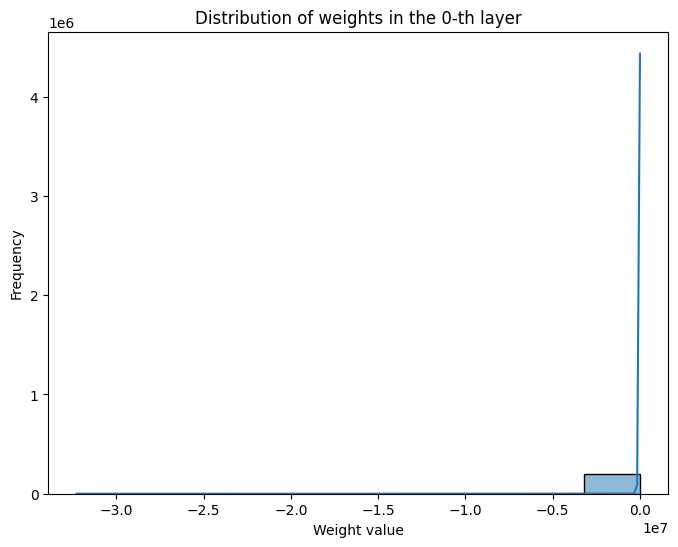

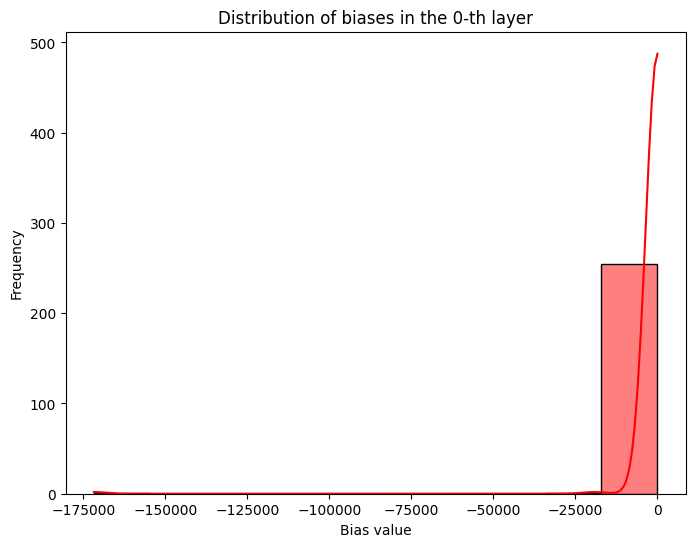

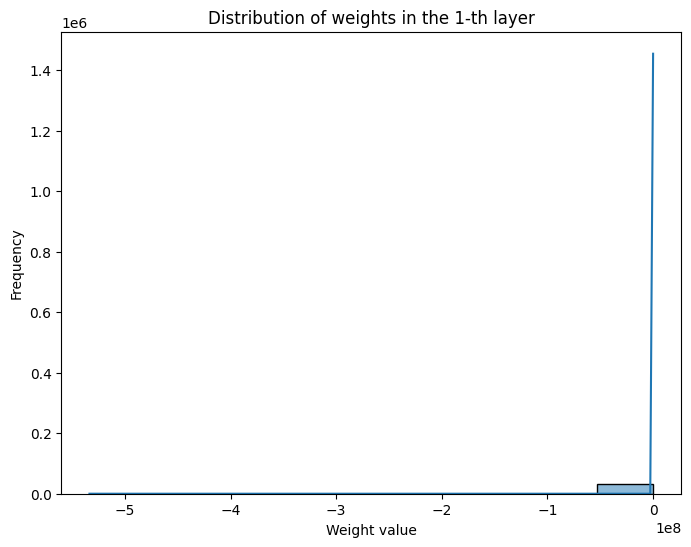

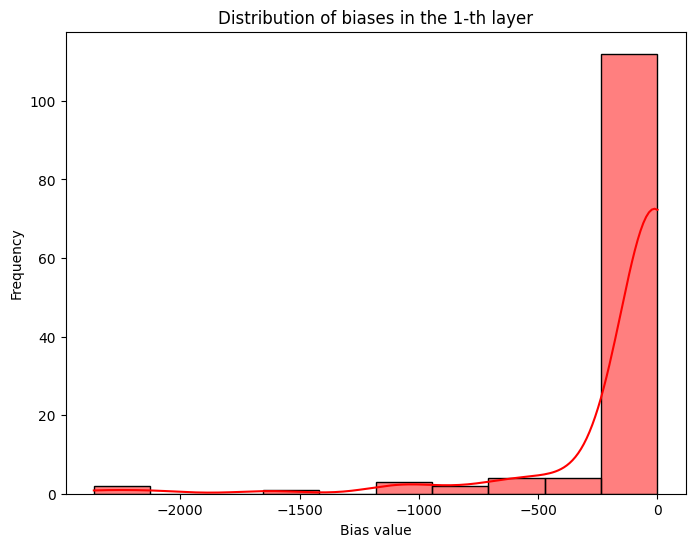

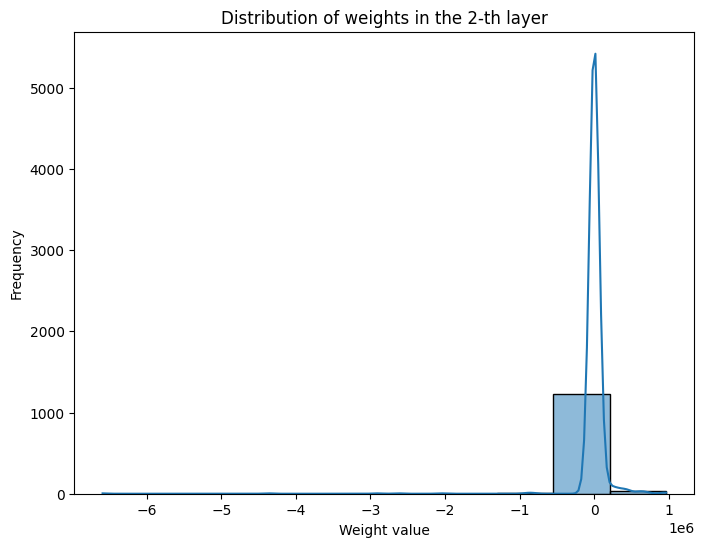

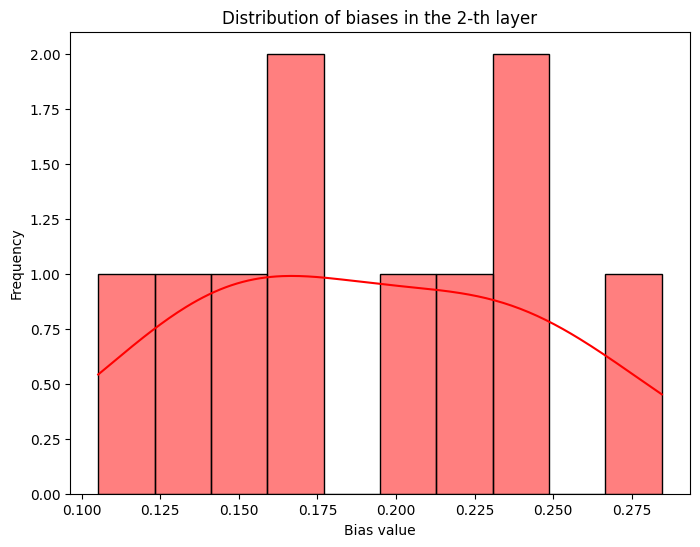

In [16]:
model.plot_weights([i for i in range(len(layer_sizes) - 1)])

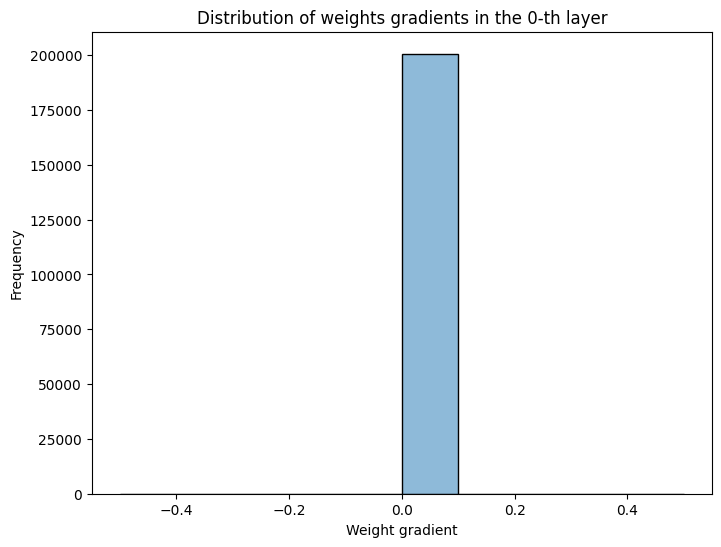

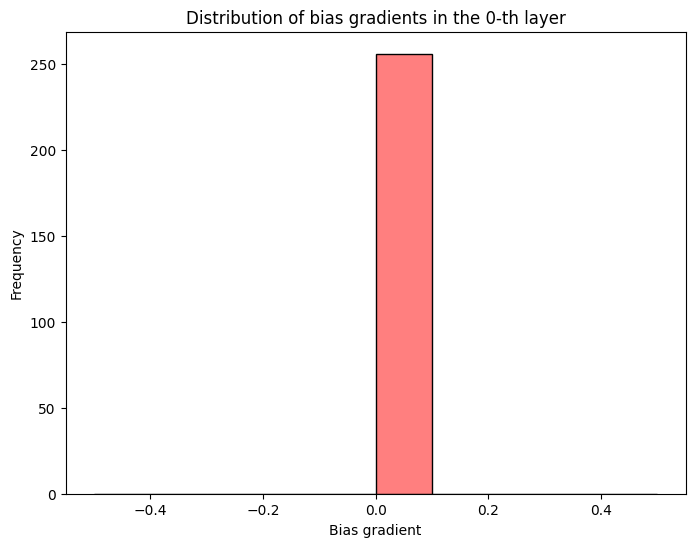

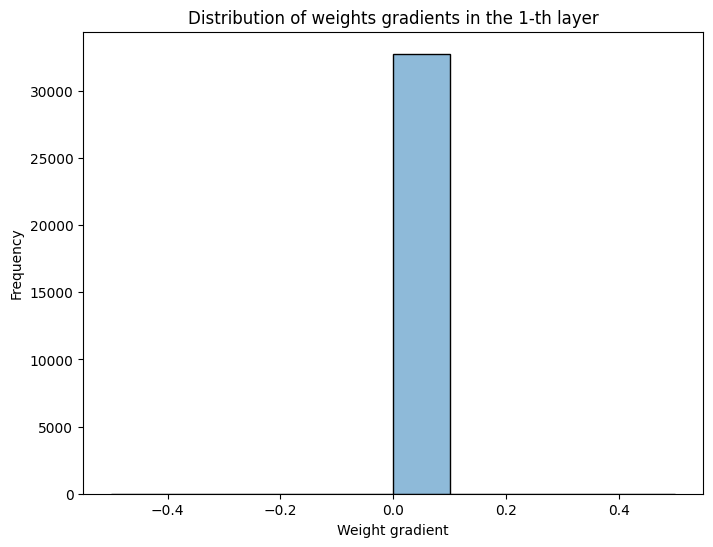

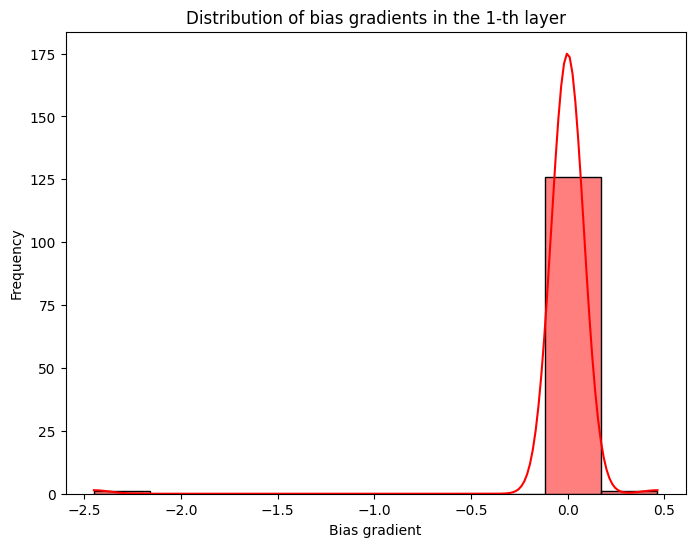

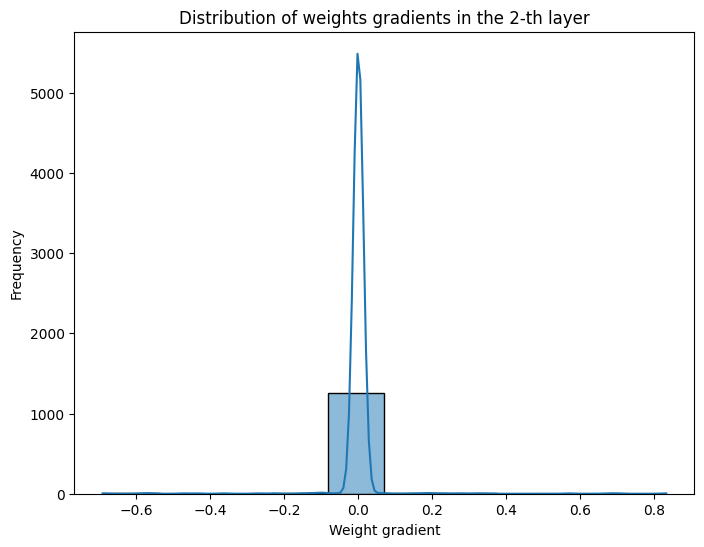

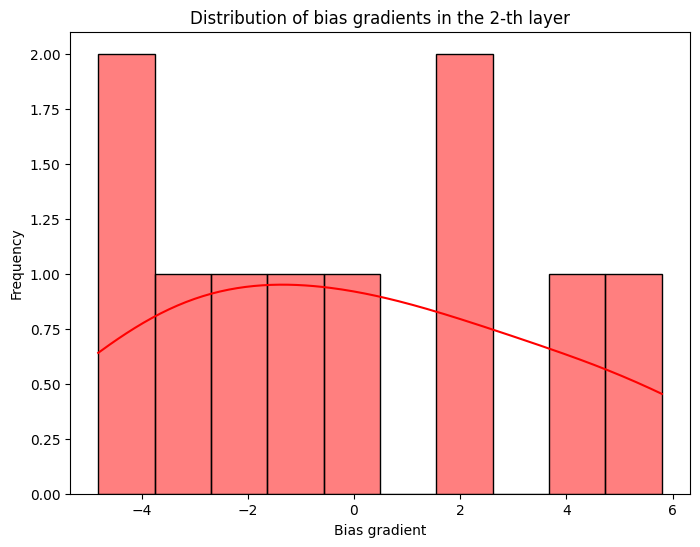

In [17]:
model.plot_gradients([i for i in range(len(layer_sizes) - 1)])

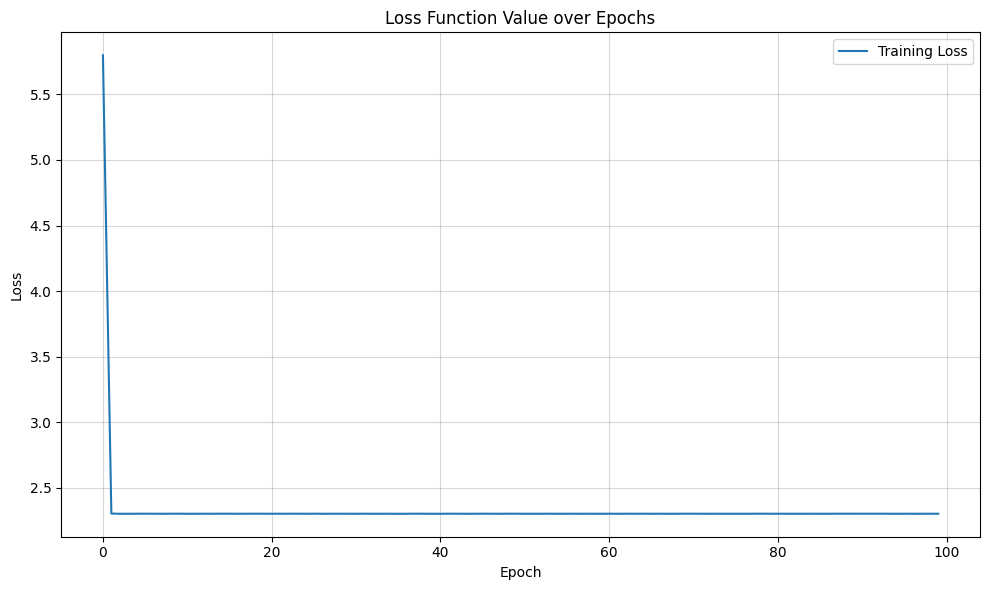

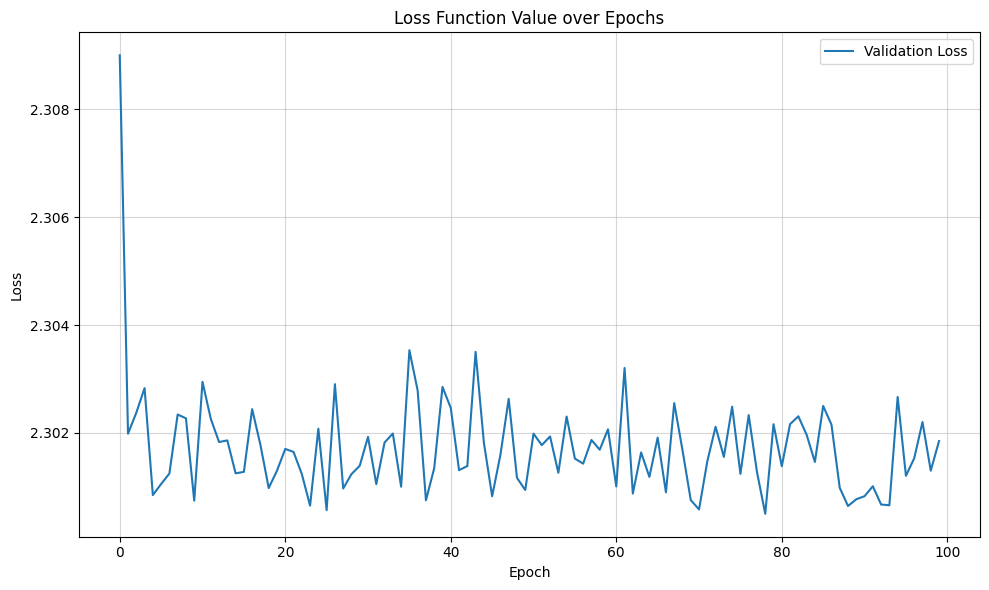

In [18]:
model.plot_loss_curve()

In [19]:
model.save_model("../../models/ffnn_model.pkl")

In [20]:
load = FFNN.load_model("../../models/ffnn_model.pkl")
y_pred = load.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 11.31%
